In [1]:
from ray.tune.analysis import Analysis
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd

In [2]:
analysis = Analysis("/home/sergei/ray_results/adversarial_external_sb")

In [3]:
target = 'policy_reward_mean/player_1'

In [45]:
df = analysis.dataframe(metric=target, mode='max')

In [46]:
df.iloc[0]

episode_reward_max                                                     6.65569
episode_reward_min                                                    -5.18928
episode_reward_mean                                                    4.59318
episode_len_mean                                                       158.272
episodes_this_iter                                                         136
                                                   ...                        
config/sgd_minibatch_size                                                 4096
config/train_batch_size                                                  16384
config/use_gae                                                            True
logdir                       /home/sergei/ray_results/adversarial_external_...
config/run_uid                                                             NaN
Name: 0, Length: 95, dtype: object

In [47]:
df.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'done', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore',
       'checkpoint_rllib', 'trainer_iteration', 'trial_id', 'experiment_tag',
       'policy_reward_min/player_1', 'policy_reward_min/player_2',
       'policy_reward_max/player_1', 'policy_reward_max/player_2',
       'policy_reward_mean/player_1', 'policy_reward_mean/player_2',
       'hist_stats/episode_reward', 'hist_stats/episode_lengths',
       'hist_stats/policy_player_1_reward',
       'hist_stats/policy_player_2_reward', 'sampler_perf/mean_env_wait_ms',
       'sampler_perf/mean_processing_ms', 'sampler_perf/mean_inference_ms',
       'timers/sample_time_ms', 't

In [48]:
for k in df.columns:
#     if k.startswith('episode'):
#         del df[k]
    if not (k.startswith('config') or k == target or k == 'checkpoint_rllib' or k == 'logdir' or k == 'experiment_tag'):
        del df[k]

In [49]:
df = df.sort_values(target, ascending=False)

In [50]:
df

,checkpoint_rllib,experiment_tag,policy_reward_mean/player_1,config/_base_dir,config/_call,config/_env,config/_env_fcn,config/_env_name_rllib,config/_get_policies,config/_log_error,...,config/num_envs_per_worker,config/num_gpus,config/num_sgd_iter,config/num_workers,config/rollout_fragment_length,config/sgd_minibatch_size,config/train_batch_size,config/use_gae,logdir,config/run_uid
1,/home/sergei/ray_results/External_multicomp_20...,1,8.690476,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_ex...","{'SingleAgentToMultiAgent': False, 'env_name':...",<function create_env at 0x7fc6831dfc20>,multicomp,<function get_policies_default at 0x7fc6831b87a0>,True,...,10,0,4,9,100,4096,16384,True,/home/sergei/ray_results/adversarial_external_...,_setme
5,/home/sergei/ray_results/External_multicomp_20...,0,7.668712,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_ex...","{'SingleAgentToMultiAgent': False, 'env_name':...",<function create_env at 0x7fc6831dfc20>,multicomp,<function get_policies_default at 0x7fc6831b87a0>,True,...,10,0,4,9,100,4096,16384,True,/home/sergei/ray_results/adversarial_external_...,_setme
6,/home/sergei/ray_results/External_multicomp_20...,0,6.235294,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_ex...","{'SingleAgentToMultiAgent': False, 'env_name':...",<function create_env at 0x7f8877e6add0>,multicomp,<function get_policies_default at 0x7f8877c113b0>,True,...,10,0,4,10,100,4096,16384,True,/home/sergei/ray_results/adversarial_external_...,_setme
3,/home/sergei/ray_results/External_multicomp_20...,2,6.233766,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_ex...","{'SingleAgentToMultiAgent': False, 'env_name':...",<function create_env at 0x7fc6831dfc20>,multicomp,<function get_policies_default at 0x7fc6831b87a0>,True,...,10,0,4,9,100,4096,16384,True,/home/sergei/ray_results/adversarial_external_...,_setme
7,/home/sergei/ray_results/External_multicomp_20...,1,-5.757576,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_ex...",{'env_name': 'multicomp/YouShallNotPassHumans-...,<function create_env at 0x7fe67f20e5f0>,multicomp,<function get_policies_default at 0x7fe67f20ea70>,True,...,10,0,4,5,100,4096,16384,True,/home/sergei/ray_results/adversarial_external_...,_setme
4,/home/sergei/ray_results/External_multicomp_20...,0,-5.877863,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_ex...",{'env_name': 'multicomp/YouShallNotPassHumans-...,<function create_env at 0x7fe67f20e5f0>,multicomp,<function get_policies_default at 0x7fe67f20ea70>,True,...,10,0,4,5,100,4096,16384,True,/home/sergei/ray_results/adversarial_external_...,_setme
0,/home/sergei/ray_results/External_multicomp_20...,0,-6.764706,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_ex...",{'env_name': 'multicomp/YouShallNotPassHumans-...,<function create_env at 0x7f29b2962680>,multicomp,<function get_policies_default at 0x7f29b2962b00>,True,...,10,0,4,5,100,4096,16384,True,/home/sergei/ray_results/adversarial_external_...,NaN
2,/home/sergei/ray_results/External_multicomp_20...,1,-7.588652,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_ex...",{'env_name': 'multicomp/YouShallNotPassHumans-...,<function create_env at 0x7f29b2962680>,multicomp,<function get_policies_default at 0x7f29b2962b00>,True,...,10,0,4,5,100,4096,16384,True,/home/sergei/ray_results/adversarial_external_...,NaN


(array([2., 2., 0., 0., 0., 0., 0., 0., 2., 2.]),
 array([-7.58865248, -5.96073961, -4.33282675, -2.70491388, -1.07700101,
         0.55091185,  2.17882472,  3.80673759,  5.43465046,  7.06256332,
         8.69047619]),
 <a list of 10 Patch objects>)

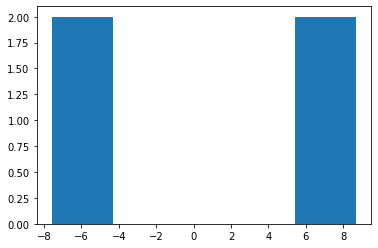

In [51]:
plt.hist(df[target])

In [52]:
idx = 1
best_trial = df.iloc[idx].logdir
df.iloc[idx]

checkpoint_rllib                  /home/sergei/ray_results/External_multicomp_20...
experiment_tag                                                                    0
policy_reward_mean/player_1                                                 7.66871
config/_base_dir                        /scratch/sergei/better-adversarial-defenses
config/_call                      {'checkpoint_freq': 0, 'name': 'adversarial_ex...
config/_env                       {'SingleAgentToMultiAgent': False, 'env_name':...
config/_env_fcn                             <function create_env at 0x7fc6831dfc20>
config/_env_name_rllib                                                    multicomp
config/_get_policies              <function get_policies_default at 0x7fc6831b87a0>
config/_log_error                                                              True
config/_main_filename             /scratch/sergei/better-adversarial-defenses/tr...
config/_model_params              {'fcnet_activation': 'tanh', 'fcnet_hidden

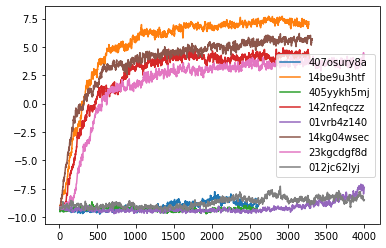

In [53]:
for k, df_ in analysis.trial_dataframes.items():
    rew = df_[target]
    plt.plot(pd.Series(rew).rolling(10).mean()[:4000], label=k.split('-')[-1])
    #imax = np.argmax(rew)
    plt.legend()
#     imax = -1
#     plt.axvline(imax)

In [54]:
idx = 0
best_trial = df.iloc[idx].logdir
df.iloc[idx]
best_trial

'/home/sergei/ray_results/adversarial_external_sb/train_one_with_sacred_1_2020-09-13_13-22-14be9u3htf'

In [55]:
df_best = analysis.trial_dataframes[best_trial]

In [66]:
checkpoint = df_best.checkpoint_rllib.iloc[imax]
checkpoint

'/home/sergei/ray_results/External_multicomp_2020-09-14_15-38-15qrx746eg/checkpoint_3273/checkpoint-3273'

In [68]:
!python ../make_video.py --checkpoint {checkpoint} --no_video=True --steps 50 --config=external

Creating agent humanoid_blocker
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Scene XML path: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/world_body.humanoid_body.humanoid_body.xml
Created Scene with agents
Config {'env': 'multicomp', 'env_config': {'with_video': False, 'SingleAgentToMultiAgent': False, 'env_name': 'multicomp/YouShallNotPassHumans-v0'}, 'multiagent': {'policies_to_train': [], 'policies': {'player_1': (<class 'ray.rllib.policy.tf_policy_template.PPOTFPolicy'>, Box(380,), Box(17,), {'model': {'custom_model': 'GymCompetePretrainedModel', 'custom_model_config': {'agent_id': 0, 'env_name': 'multicomp/YouShallNotPassHumans-v0', 'model_config': {}, 'name': 'model_0', 'load_weigh

In [69]:
!export DISPLAY=:0; python ../make_video.py --checkpoint {checkpoint} --config=external

Creating agent humanoid_blocker
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Scene XML path: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/world_body.humanoid_body.humanoid_body.xml
Created Scene with agents
GLFW error: 65544, desc: b'X11: RandR gamma ramp support seems broken'
Config {'env': 'multicomp', 'env_config': {'with_video': True, 'SingleAgentToMultiAgent': False, 'env_name': 'multicomp/YouShallNotPassHumans-v0'}, 'multiagent': {'policies_to_train': [], 'policies': {'player_1': (<class 'ray.rllib.policy.tf_policy_template.PPOTFPolicy'>, Box(380,), Box(17,), {'model': {'custom_model': 'GymCompetePretrainedModel', 'custom_model_config': {'agent_id': 0, 'env_name': 'multicomp/YouShal

In [81]:
#video = _
video = "video-20200918-135137-beae468e-f9f0-11ea-b316-e0d55e6af99c/video.000000.mp4"

In [82]:
from IPython.display import display, FileLink

local_file = FileLink(video, result_html_prefix="Click here to download: ")
display(local_file)

/scratch/sergei/better-adversarial-defenses/experiment_analysis/video-20200918-135137-beae468e-f9f0-11ea-b316-e0d55e6af99c/video.000000.mp4

In [83]:
from IPython.display import HTML

HTML(f"""
    <video alt="test" controls>
        <source src="{video}" type="video/mp4">
    </video>
""")


In [77]:
f"""
    <video alt="test" controls>
        <source src="{video}" type="video/mp4">
    </video>
"""

'\n    <video alt="test" controls>\n        <source src="experiment_analysis/video-20200918-135137-beae468e-f9f0-11ea-b316-e0d55e6af99c/video.000000.mp4" type="video/mp4">\n    </video>\n'